# Cosinor Regression Model used for 24-hours Window Analysis

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.ma import add
from CosinorPy import file_parser, cosinor, cosinor1, cosinor_nonlin
np.seterr(divide='ignore')
import scipy.signal as signal
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.multitest as multi
from scipy.optimize import curve_fit
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from scipy.stats import percentileofscore
from scipy.stats import circstd, circmean

import copy
import itertools
from random import sample
import os
import copy
from CosinorPy.helpers import df_add_row

### Data Preparation

In [6]:
def load_data(path):
    """Function used to parser the data using the file_parser method from the CosinorPy package"""
    df = pd.read_csv(path)
    df['Region start time'] = pd.to_datetime(df['Region start time'])
    df['date'] = df['Region start time'].dt.date
    df['hour'] = df['Region start time'].dt.hour
    df = df.drop('Unnamed: 0', axis=1)
    return df

In [7]:
pre_data = load_data("data/RNS_G_Pre_output.csv")
post_data = load_data("data/RNS_G_M1_output.csv")

In [ ]:
def prepare_data(df):
    """Function used to prepare the data for Cosinor Regression"""
    df1 = df.copy()
    df1["test"] = df1["date"].astype(str)
    df1["x"] = df1["hour"]
    df1["y"] = df1["Pattern A Channel 2"]
    
    return df1

/opt/anaconda3/lib/python3.12/site-packages/CosinorPy/cosinor.py:1658: RuntimeWarning: invalid value encountered in scalar divide
  F = (SSLOF/(n_T-1-2*n_components))/(SSPE/(N-n_T))
/opt/anaconda3/lib/python3.12/site-packages/CosinorPy/cosinor.py:1658: RuntimeWarning: invalid value encountered in scalar divide
  F = (SSLOF/(n_T-1-2*n_components))/(SSPE/(N-n_T))
/opt/anaconda3/lib/python3.12/site-packages/CosinorPy/cosinor.py:1658: RuntimeWarning: invalid value encountered in scalar divide
  F = (SSLOF/(n_T-1-2*n_components))/(SSPE/(N-n_T))
/opt/anaconda3/lib/python3.12/site-packages/CosinorPy/cosinor.py:1658: RuntimeWarning: invalid value encountered in scalar divide
  F = (SSLOF/(n_T-1-2*n_components))/(SSPE/(N-n_T))
/opt/anaconda3/lib/python3.12/site-packages/CosinorPy/cosinor.py:1658: RuntimeWarning: invalid value encountered in scalar divide
  F = (SSLOF/(n_T-1-2*n_components))/(SSPE/(N-n_T))
/opt/anaconda3/lib/python3.12/site-packages/CosinorPy/cosinor.py:1658: RuntimeWarning: inv

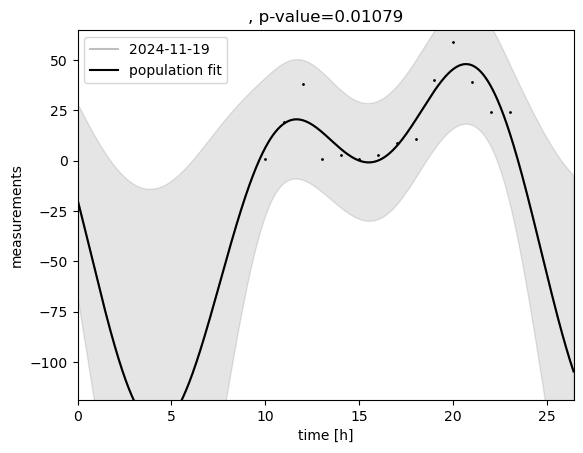

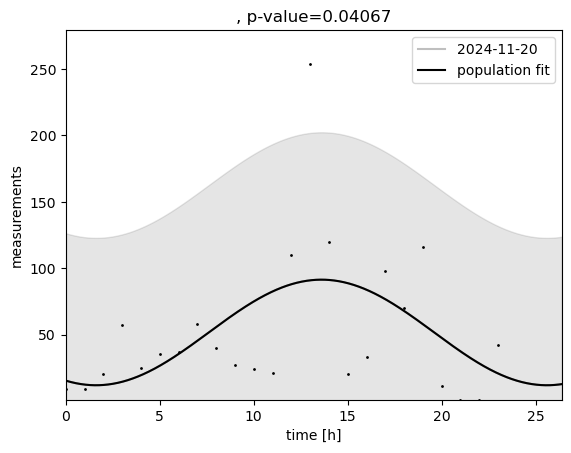

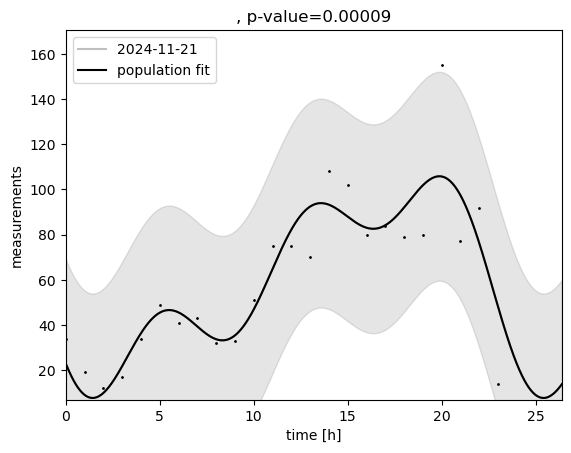

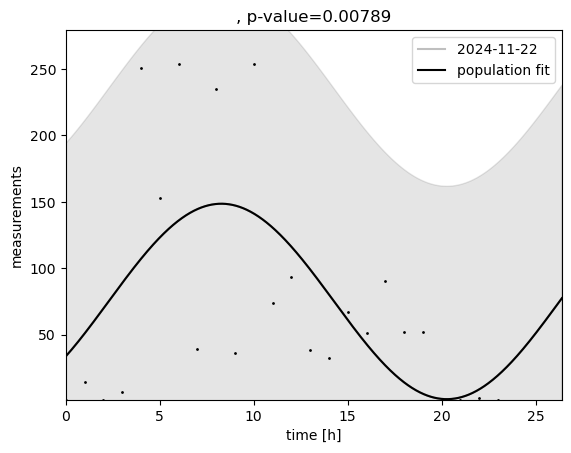

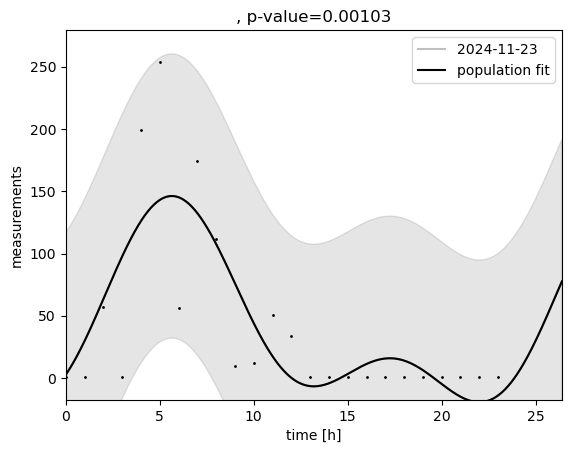

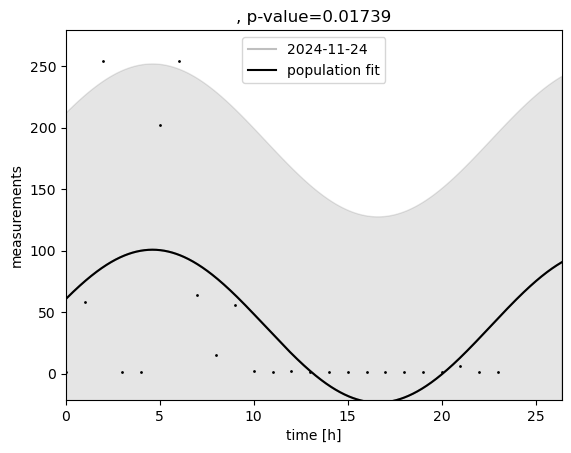

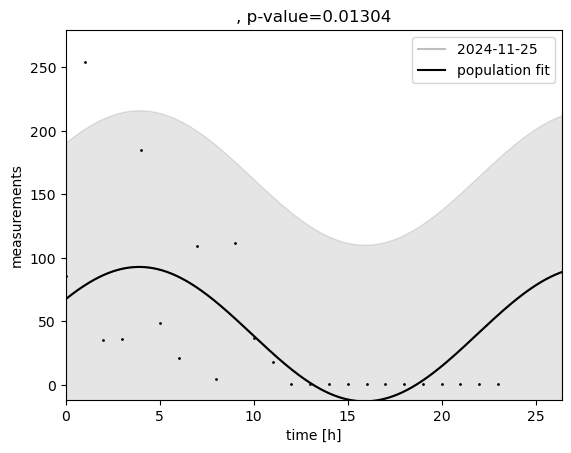

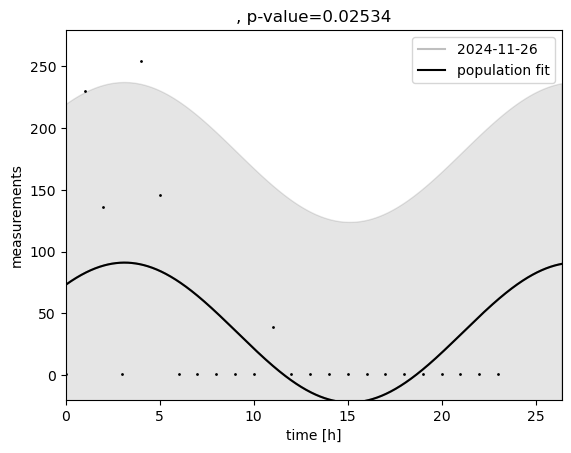

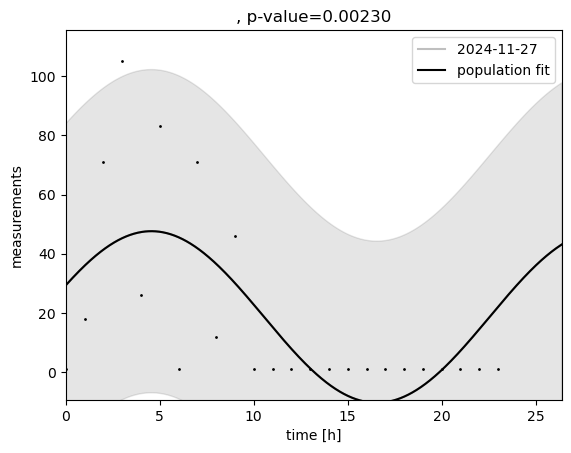

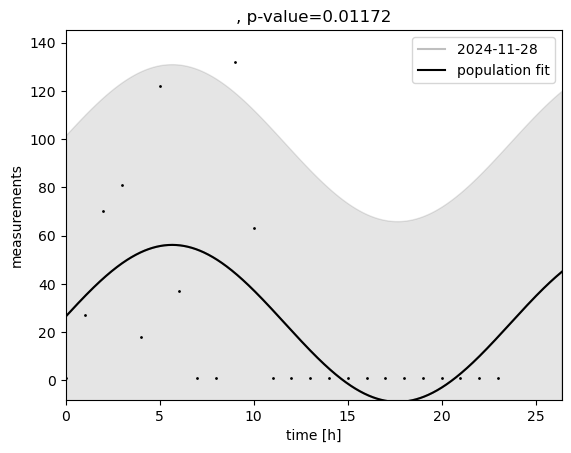

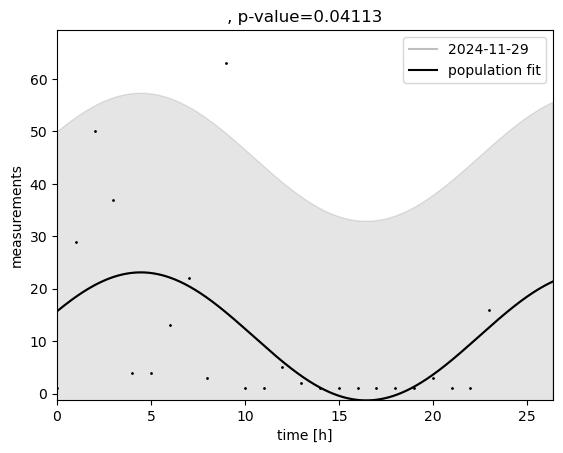

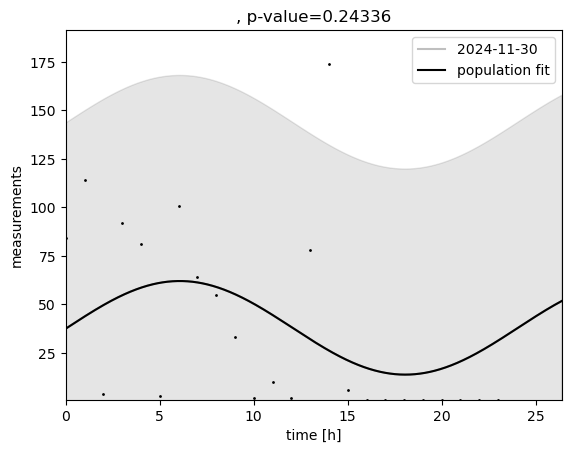

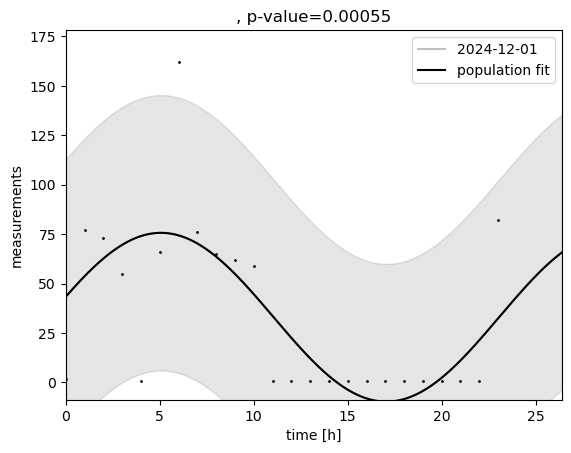

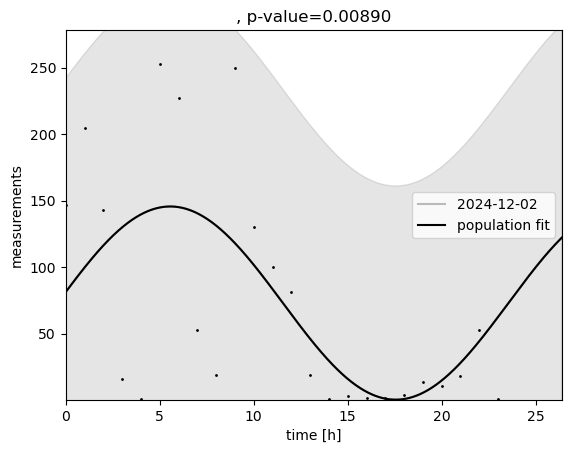

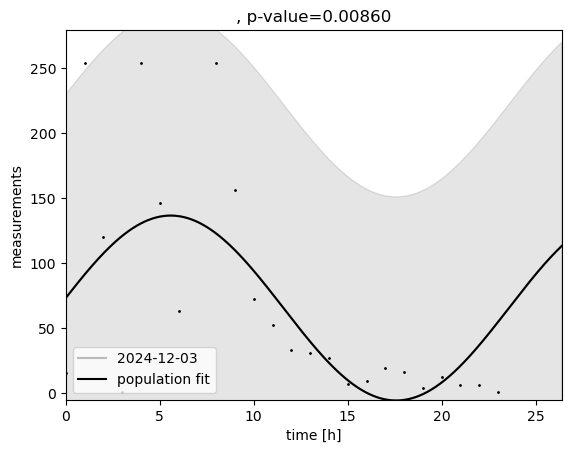

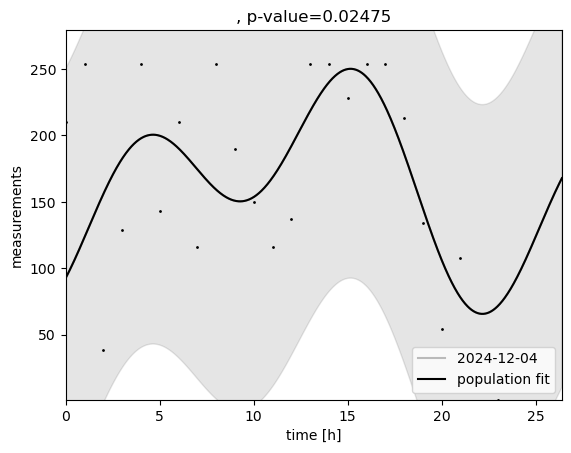

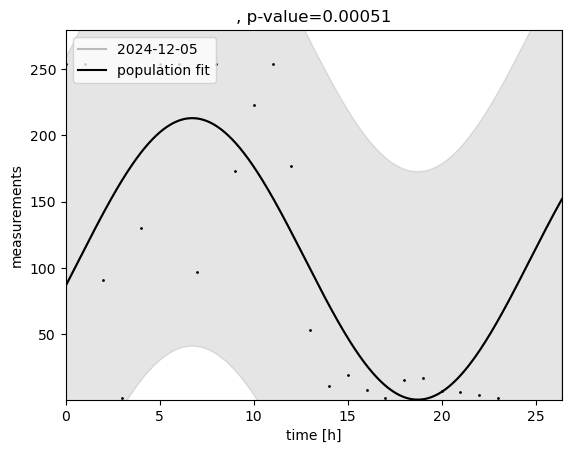

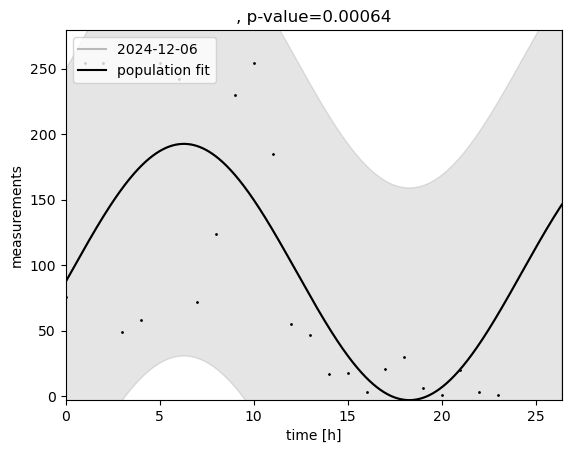

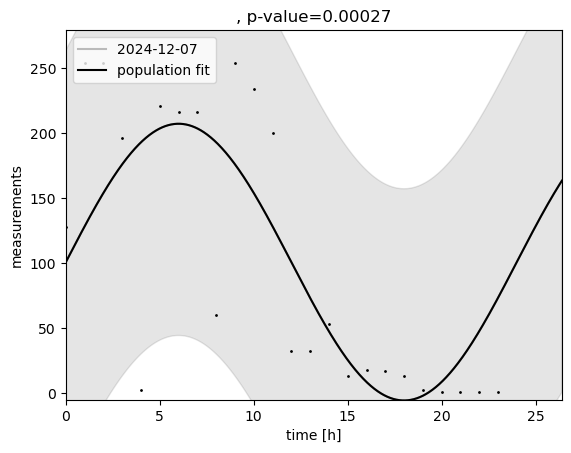

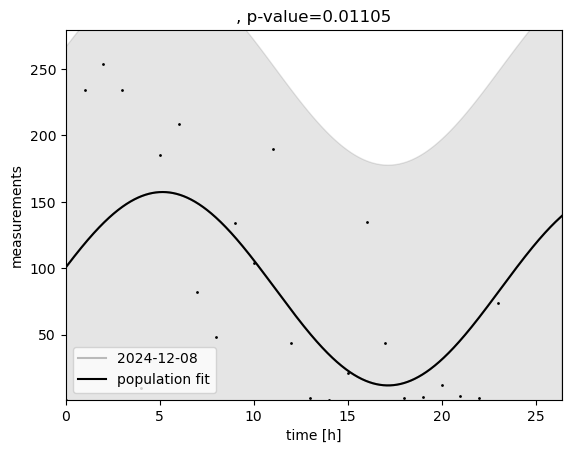

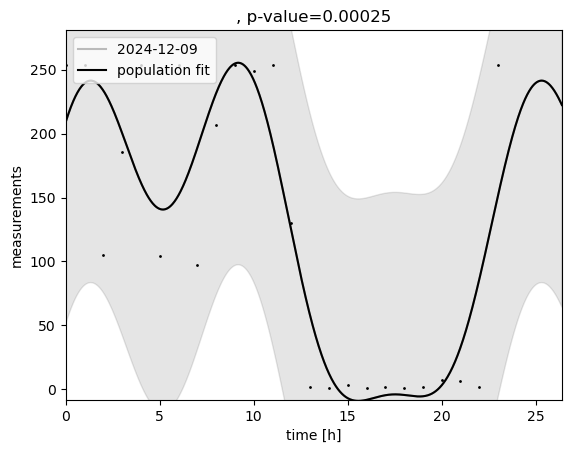

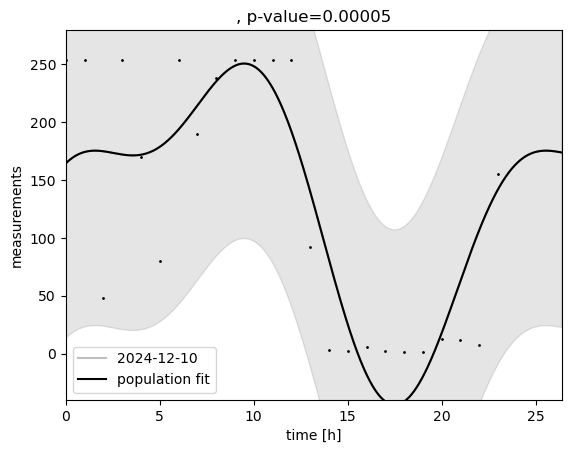

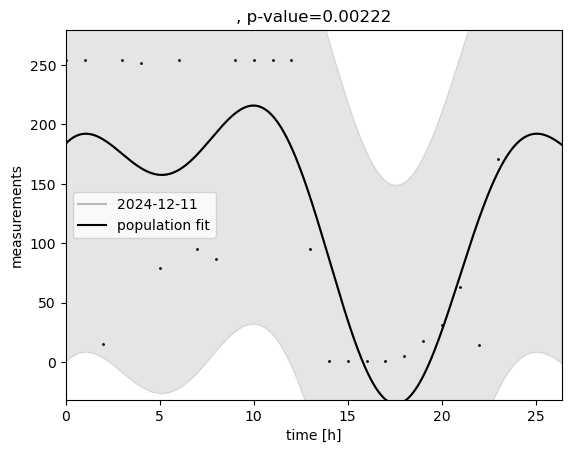

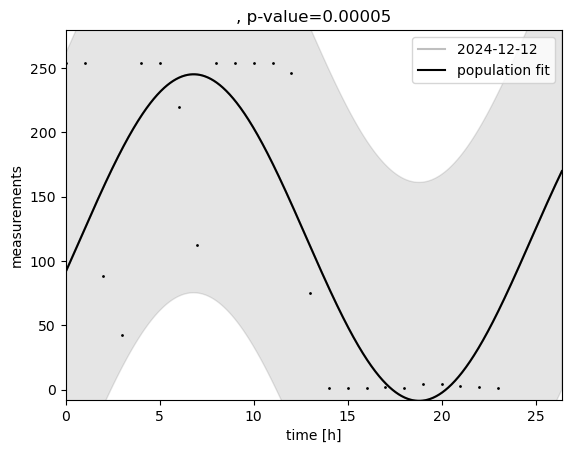

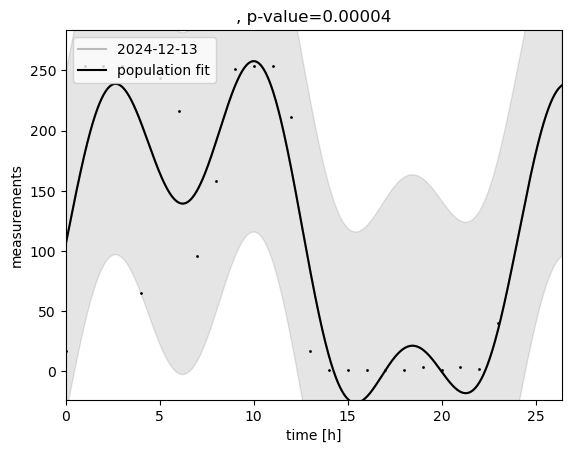

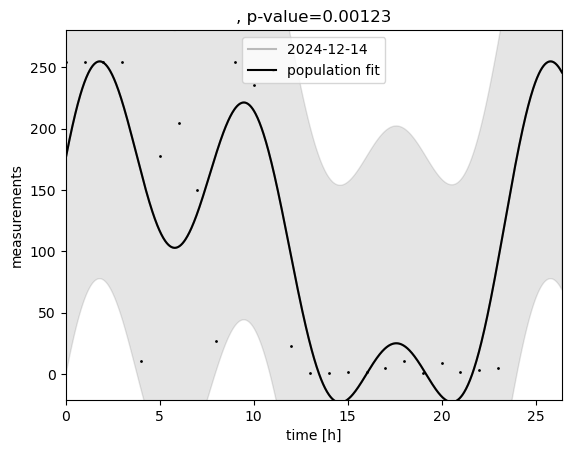

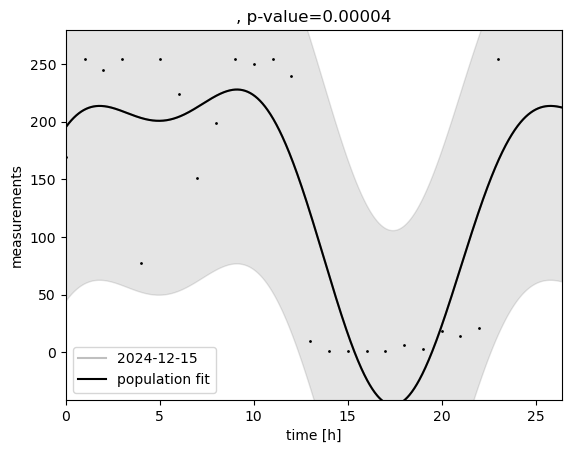

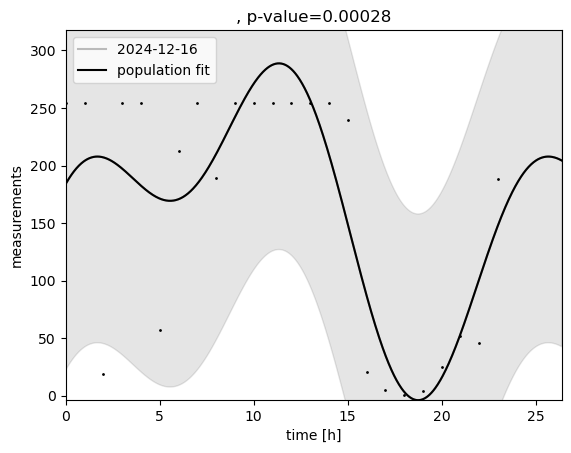

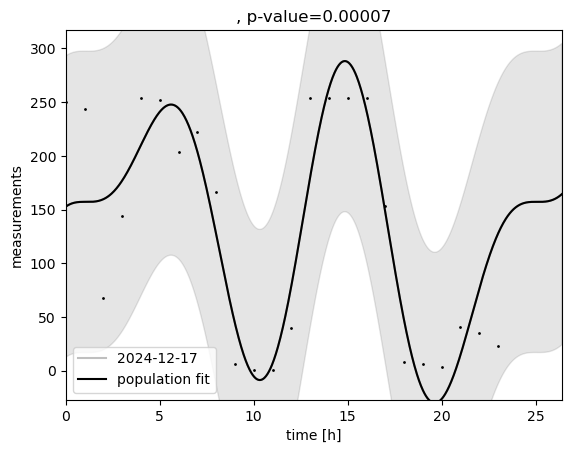

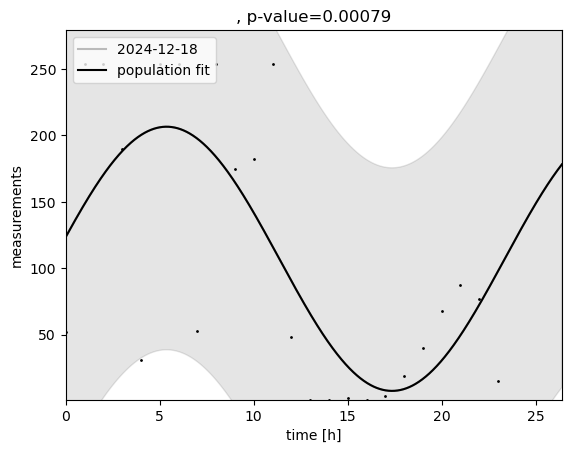

,test,period,n_components,p,q,p_reject,q_reject,RSS,amplitude,acrophase,...,resid_SE,mean(amplitude),p(amplitude),CI(amplitude),mean(acrophase),p(acrophase),CI(acrophase),mean(mesor),p(mesor),CI(mesor)
0,2024-11-19,24.0,2.0,0.010788,0.017759,NaN,NaN,1188.007378,89.986933,0.874237,...,11.489161,89.986933,NaN,"[nan, <function nan_to_num at 0x120c725c0>]",0.874237,NaN,"[nan, <function nan_to_num at 0x120c725c0>]",-41.960662,NaN,"[nan, <function nan_to_num at 0x120c725c0>]"
1,2024-11-20,24.0,1.0,0.040673,0.052277,NaN,NaN,53245.291688,39.776976,2.723343,...,50.353650,39.776976,NaN,"[nan, <function nan_to_num at 0x120c725c0>]",2.723343,NaN,"[nan, <function nan_to_num at 0x120c725c0>]",51.583343,NaN,"[nan, <function nan_to_num at 0x120c725c0>]"
2,2024-11-21,24.0,3.0,0.000092,0.000826,NaN,NaN,6316.739215,49.053231,1.075500,...,19.276226,49.053231,NaN,"[nan, <function nan_to_num at 0x120c725c0>]",1.075500,NaN,"[nan, <function nan_to_num at 0x120c725c0>]",56.777238,NaN,"[nan, <function nan_to_num at 0x120c725c0>]"
3,2024-11-22,24.0,1.0,0.007890,0.014793,NaN,NaN,111026.682982,73.627486,-2.163579,...,72.711656,73.627486,NaN,"[nan, <function nan_to_num at 0x120c725c0>]",-2.163579,NaN,"[nan, <function nan_to_num at 0x120c725c0>]",74.958250,NaN,"[nan, <function nan_to_num at 0x120c725c0>]"
4,2024-11-23,24.0,2.0,0.001031,0.003568,NaN,NaN,46762.945265,82.760037,-1.471737,...,49.610560,82.760037,NaN,"[nan, <function nan_to_num at 0x120c725c0>]",-1.471737,NaN,"[nan, <function nan_to_num at 0x120c725c0>]",63.425193,NaN,"[nan, <function nan_to_num at 0x120c725c0>]"
5,2024-11-24,24.0,1.0,0.017392,0.026087,NaN,NaN,98516.853895,62.177588,-1.207579,...,68.492910,62.177588,NaN,"[nan, <function nan_to_num at 0x120c725c0>]",-1.207579,NaN,"[nan, <function nan_to_num at 0x120c725c0>]",38.625074,NaN,"[nan, <function nan_to_num at 0x120c725c0>]"
6,2024-11-25,24.0,1.0,0.013041,0.020236,NaN,NaN,65706.341944,52.937483,-1.018895,...,55.936334,52.937483,NaN,"[nan, <function nan_to_num at 0x120c725c0>]",-1.018895,NaN,"[nan, <function nan_to_num at 0x120c725c0>]",39.958294,NaN,"[nan, <function nan_to_num at 0x120c725c0>]"
7,2024-11-26,24.0,1.0,0.025340,0.036785,NaN,NaN,91942.742134,56.667499,-0.817632,...,66.168163,56.667499,NaN,"[nan, <function nan_to_num at 0x120c725c0>]",-0.817632,NaN,"[nan, <function nan_to_num at 0x120c725c0>]",34.333412,NaN,"[nan, <function nan_to_num at 0x120c725c0>]"
8,2024-11-27,24.0,1.0,0.002298,0.006074,NaN,NaN,12844.449011,28.960973,-1.195000,...,24.731365,28.960973,NaN,"[nan, <function nan_to_num at 0x120c725c0>]",-1.195000,NaN,"[nan, <function nan_to_num at 0x120c725c0>]",18.666638,NaN,"[nan, <function nan_to_num at 0x120c725c0>]"
9,2024-11-28,24.0,1.0,0.011723,0.018509,NaN,NaN,24114.235568,32.549370,-1.484316,...,33.886530,32.549370,NaN,"[nan, <function nan_to_num at 0x120c725c0>]",-1.484316,NaN,"[nan, <function nan_to_num at 0x120c725c0>]",23.583257,NaN,"[nan, <function nan_to_num at 0x120c725c0>]"


In [82]:
df_results = cosinor.population_fit_group(prepare_data(pre_data), n_components = [1,2,3], period=24, plot=False)
df_best_models = cosinor.get_best_models_population(prepare_data(pre_data), df_results, n_components = [1,2,3])
cosinor.plot_df_models_population(prepare_data(pre_data), df_best_models)
df_best_models